In [470]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [471]:
data = pd.read_csv('./train.csv')

In [472]:
data.shape

(8693, 14)

In [473]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [474]:
data = data.drop(['Name'], axis = 1)

In [475]:
# data['PassengerId_num'] = data['PassengerId'].astype("string")

# for i in range(len(data.PassengerId_num)):
#     data.PassengerId_num[i] = data.PassengerId_num[i][:-3]

# data['PassengerId_sp'] = data['PassengerId'].astype("string")

# for i in range(len(data.PassengerId_sp)):
#     data.PassengerId_sp[i] = data.PassengerId_sp[i][-1]

# data['PassengerId_sp'] = pd.to_numeric(data['PassengerId_sp'])

# for i in range(len(data.PassengerId_sp)):
#     if (data.PassengerId_sp[i] == 1 and data.PassengerId_num[i] == data.PassengerId_num[i + 1]) or (data.PassengerId_sp[i] > 1):
#         data.PassengerId_sp[i] = 1
#     else:
#         data.PassengerId_sp[i] = 0
# data = data.rename(columns={'PassengerId_sp' : 'Alone_NAlone'})

In [476]:
data.sample(13)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
3423,3690_01,Earth,False,F/762/P,TRAPPIST-1e,35.0,False,0.0,30.0,357.0,435.0,0.0,True
812,0863_03,Earth,True,G/129/S,TRAPPIST-1e,6.0,False,0.0,0.0,0.0,0.0,0.0,False
7494,8016_01,Earth,False,E/531/S,TRAPPIST-1e,15.0,False,0.0,10.0,0.0,595.0,381.0,False
5877,6224_02,Earth,False,G/1006/S,55 Cancri e,8.0,False,0.0,0.0,0.0,0.0,0.0,True
1188,1260_01,Earth,True,G/186/P,PSO J318.5-22,22.0,False,0.0,0.0,0.0,0.0,0.0,True
8431,9007_01,Earth,True,G/1458/P,TRAPPIST-1e,18.0,False,0.0,0.0,0.0,0.0,0.0,False
5367,5733_01,Earth,False,G/922/P,55 Cancri e,34.0,False,0.0,1745.0,6.0,5.0,37.0,True
3805,4064_01,Earth,False,F/767/S,TRAPPIST-1e,47.0,False,939.0,1477.0,NaN,0.0,0.0,True
2787,3006_01,Earth,False,G/474/S,PSO J318.5-22,19.0,False,23.0,0.0,0.0,0.0,732.0,False
3604,3870_01,Europa,True,B/148/S,55 Cancri e,22.0,False,0.0,0.0,0.0,0.0,0.0,True


In [477]:
data['HomePlanet'] = data['HomePlanet'].astype('string')
data['CryoSleep'] = data['CryoSleep'].astype('string')
data['Destination'] = data['Destination'].astype('string')
data['VIP'] = data['VIP'].astype('string')

In [478]:
values = {"Cabin": 'NNNNNN', 'RoomService' : 0.0, 'FoodCourt' : 0.0, 'ShoppingMall' : 0.0, 'Spa' : 0.0, 'VRDeck' : 0.0, 'Age' : data.Age.mean(), 'HomePlanet' : 'none', 'CryoSleep' : 'none', 'Destination' : 'none', 'VIP' : 'none'}
data = data.fillna(value=values)

In [479]:
data['Deck'] = data['Cabin'].astype("string")
data['Side'] = data['Cabin'].astype('string')
data['Cabin'] = data['Cabin'].astype('string')

In [480]:
for i in range(len(data.Deck)):
    data.Deck[i] = data.Deck[i][0]

In [481]:
for i in range(len(data.Side)):
    data.Side[i] = data.Side[i][-1]

In [482]:
for i in range(len(data.Cabin)):
    data.Cabin[i] = data.Cabin[i][2:-2]

In [483]:
data = data.replace('NN', '0')

In [484]:
data.shape

(8693, 15)

In [485]:
data.isna().sum()

PassengerId     0
HomePlanet      0
CryoSleep       0
Cabin           0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Transported     0
Deck            0
Side            0
dtype: int64

In [486]:
data = data.drop(['PassengerId'],axis=1)

In [487]:
data.sample(5)

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Deck,Side
5485,Earth,False,1117,TRAPPIST-1e,36.0,False,0.0,75.0,106.0,0.0,1903.0,True,F,S
878,Earth,False,136,TRAPPIST-1e,38.0,False,55.0,741.0,0.0,0.0,13.0,True,G,P
2618,Europa,False,87,TRAPPIST-1e,27.0,False,1.0,767.0,0.0,13104.0,3657.0,False,B,P
760,Earth,False,146,TRAPPIST-1e,29.0,False,0.0,0.0,0.0,0.0,645.0,False,F,S
8096,Europa,True,325,TRAPPIST-1e,55.0,False,0.0,0.0,0.0,0.0,0.0,True,C,S


In [488]:
data['Cabin'] = pd.to_numeric(data['Cabin'])

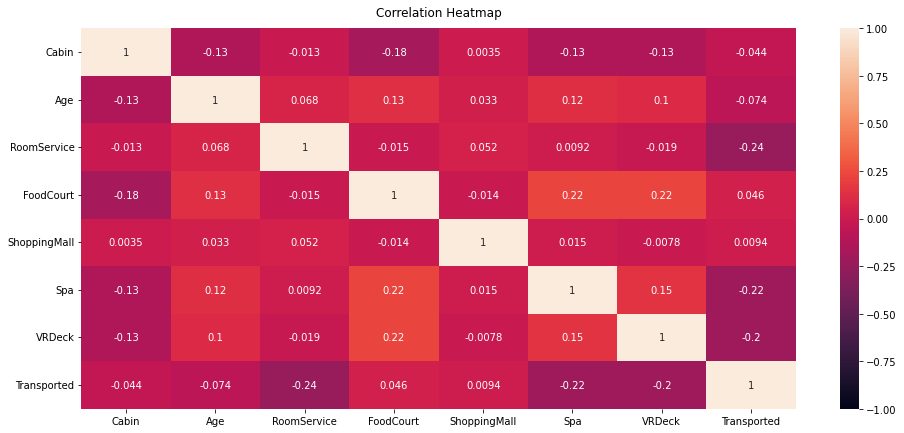

In [489]:
import seaborn as sns
plt.figure(figsize=(16, 7))
heatmap = sns.heatmap(data.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

In [490]:
num_cols = ['Cabin', 'Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
cat_cols = ['HomePlanet', 'CryoSleep', 'Destination', 'VIP', 'Deck', 'Side']    

In [491]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    8693 non-null   string 
 1   CryoSleep     8693 non-null   string 
 2   Cabin         8693 non-null   int64  
 3   Destination   8693 non-null   string 
 4   Age           8693 non-null   float64
 5   VIP           8693 non-null   string 
 6   RoomService   8693 non-null   float64
 7   FoodCourt     8693 non-null   float64
 8   ShoppingMall  8693 non-null   float64
 9   Spa           8693 non-null   float64
 10  VRDeck        8693 non-null   float64
 11  Transported   8693 non-null   bool   
 12  Deck          8693 non-null   string 
 13  Side          8693 non-null   string 
dtypes: bool(1), float64(6), int64(1), string(6)
memory usage: 891.5 KB


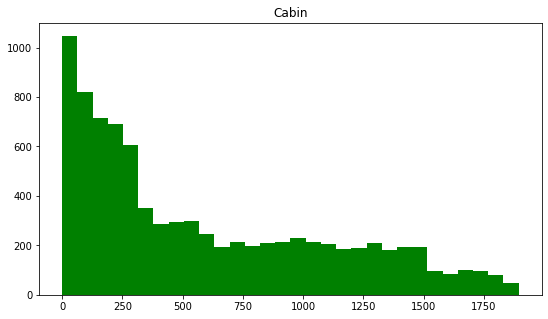

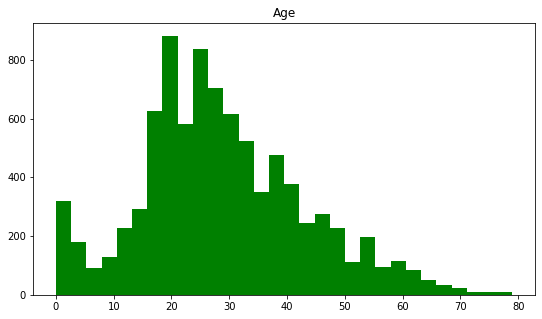

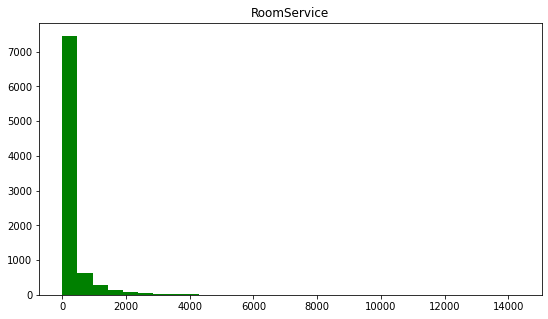

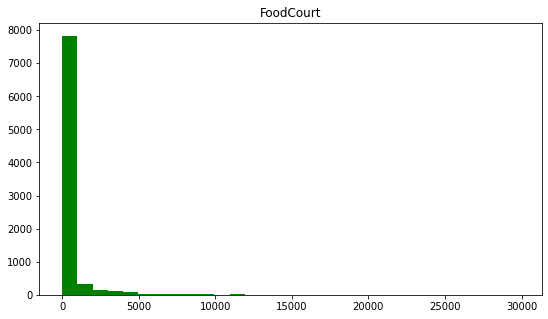

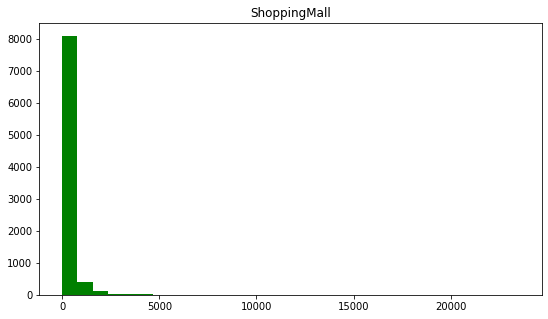

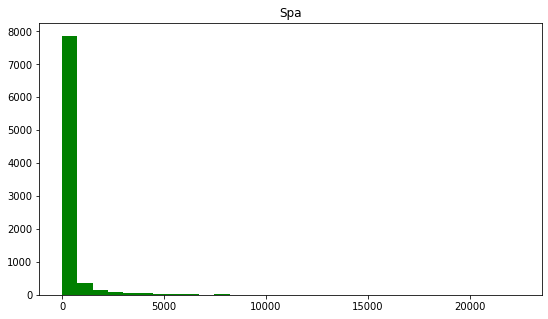

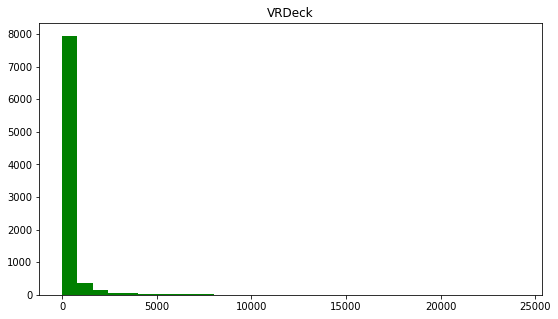

In [492]:
for i in range(len(num_cols)):
    plt.figure(figsize=(9, 5))
    plt.hist(x=num_cols[i], data=data, bins=30, color = 'green')
    plt.title(num_cols[i])
    plt.show()

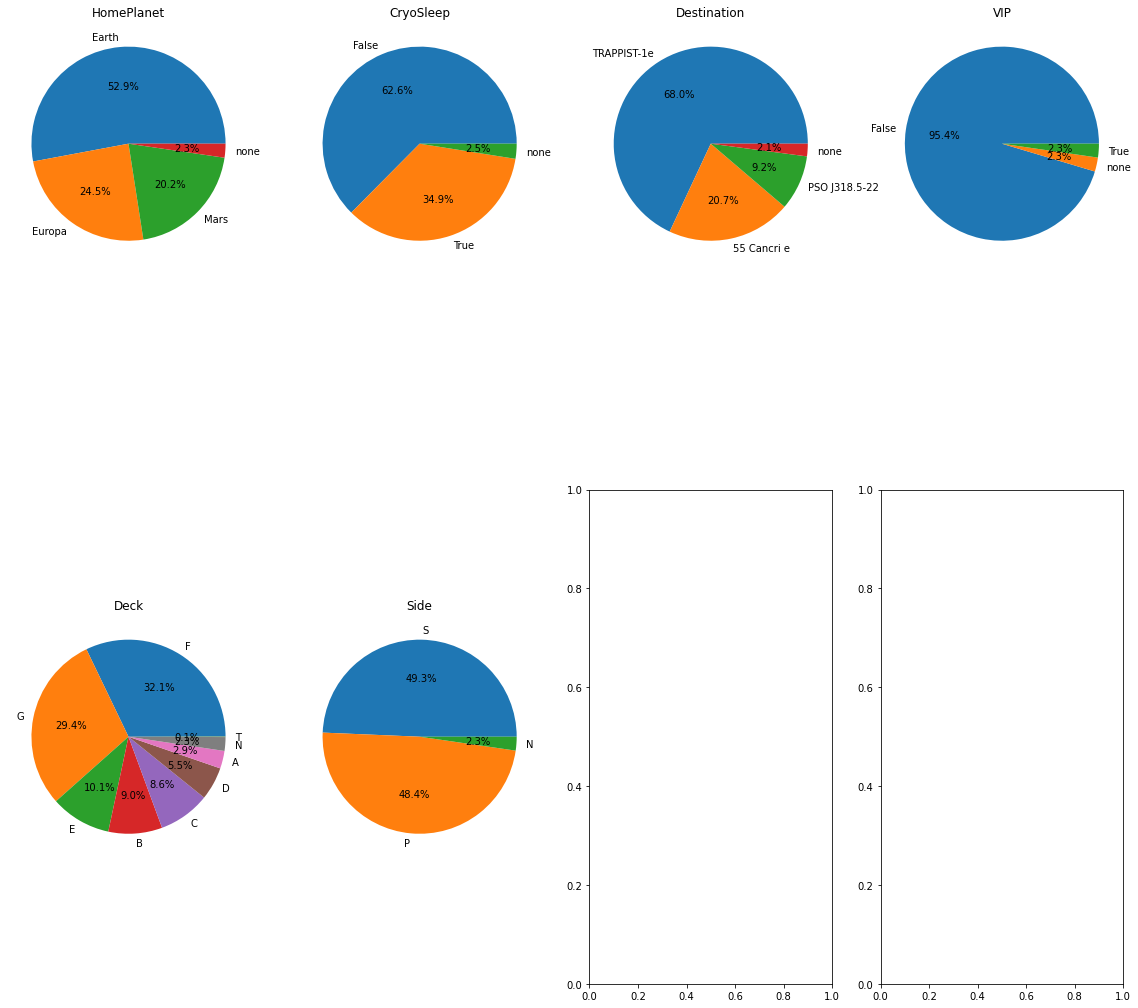

In [493]:
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(20, 20))
ax = axes.ravel()
for i, cat in enumerate(cat_cols):
    x = data[cat].value_counts()
    index = x.index 
    ax[i].pie(x=x, labels=index, autopct='%1.1f%%')
    ax[i].set_title(cat)

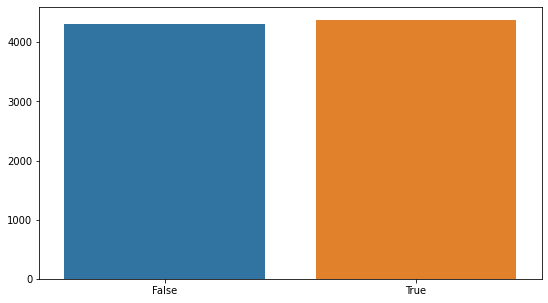

In [494]:
plt.figure(figsize=(9, 5))
sns.barplot(data=data, x = data['Transported'].value_counts().index, y=data['Transported'].value_counts().values)
plt.show()

In [495]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, RobustScaler, LabelEncoder, OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer

In [496]:
transformer = make_column_transformer((StandardScaler(), num_cols), (OneHotEncoder(), cat_cols))

In [497]:
X = data.drop(['Transported'], axis=1)
y = data['Transported']

In [498]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [499]:
clf = make_pipeline(transformer, LogisticRegression())
params = {'logisticregression__C':[100, 10, 1, 0.1, 0.01, 0.001], 'logisticregression__max_iter' : [100, 500, 1000]}

gs_clf = GridSearchCV(clf, params, cv=5, n_jobs = -1, refit=True, scoring='roc_auc')
gs_clf.fit(X_train, y_train).best_params_

{'logisticregression__C': 10, 'logisticregression__max_iter': 100}

In [500]:
best_clf = gs_clf.best_estimator_

In [501]:
y_train_pr = best_clf.predict_proba(X_train)[:, 1]
y_pred = best_clf.predict_proba(X_test)[:, 1]

In [502]:
from sklearn.metrics import roc_auc_score
train_auc = roc_auc_score(y_train, y_train_pr)
test_auc = roc_auc_score(y_test, y_pred)
print(f'train auc: {train_auc}')
print(f'test auc: {test_auc}')

train auc: 0.8821971627099017
test auc: 0.8729201886877315


In [503]:
from sklearn.ensemble import RandomForestClassifier

clf = make_pipeline(transformer, RandomForestClassifier())
params = {'randomforestclassifier__criterion': ['gini', 'entropy', 'log_loss'], 'randomforestclassifier__n_estimators' : [100, 200, 300], 'randomforestclassifier__max_depth' : [3, 5, 7, 10]}

gs_clf = GridSearchCV(clf, params, cv=5, n_jobs = -1, refit=True, scoring='roc_auc')
gs_clf.fit(X_train, y_train).best_params_

{'randomforestclassifier__criterion': 'log_loss',
 'randomforestclassifier__max_depth': 10,
 'randomforestclassifier__n_estimators': 200}

In [504]:
rf_best_clf = gs_clf.best_estimator_

In [505]:
y_train_pr = rf_best_clf.predict_proba(X_train)[:, 1]
y_pred = rf_best_clf.predict_proba(X_test)[:, 1]

In [506]:
train_auc = roc_auc_score(y_train, y_train_pr)
test_auc = roc_auc_score(y_test, y_pred)

print(f'train auc: {train_auc}')
print(f'test auc: {test_auc}')

train auc: 0.9447475390851188
test auc: 0.8853772299519285


In [507]:
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [508]:
import catboost

In [509]:
catboost_clf = catboost.CatBoostClassifier(cat_features=cat_cols, iterations=150, loss_function='Logloss')
params = {'learning_rate': [0.03, 0.1],
          'depth': [4, 6, 10],
          'l2_leaf_reg': [1, 3, 5]}
search = GridSearchCV(catboost_clf, params, cv = 5, n_jobs=-1, scoring='roc_auc')
best = search.fit(X_train, y_train).best_estimator_

0:	learn: 0.6583680	total: 34.6ms	remaining: 5.16s
1:	learn: 0.6315202	total: 64ms	remaining: 4.74s
2:	learn: 0.6074741	total: 92ms	remaining: 4.51s
3:	learn: 0.5871407	total: 119ms	remaining: 4.35s
4:	learn: 0.5703501	total: 186ms	remaining: 5.38s
5:	learn: 0.5569457	total: 211ms	remaining: 5.05s
6:	learn: 0.5444866	total: 243ms	remaining: 4.97s
7:	learn: 0.5333232	total: 274ms	remaining: 4.86s
8:	learn: 0.5209573	total: 305ms	remaining: 4.78s
9:	learn: 0.5093892	total: 334ms	remaining: 4.67s
10:	learn: 0.4995517	total: 364ms	remaining: 4.6s
11:	learn: 0.4909379	total: 393ms	remaining: 4.52s
12:	learn: 0.4832812	total: 421ms	remaining: 4.43s
13:	learn: 0.4762944	total: 452ms	remaining: 4.39s
14:	learn: 0.4696783	total: 483ms	remaining: 4.35s
15:	learn: 0.4632723	total: 512ms	remaining: 4.29s
16:	learn: 0.4571049	total: 542ms	remaining: 4.24s
17:	learn: 0.4518207	total: 573ms	remaining: 4.2s
18:	learn: 0.4452654	total: 601ms	remaining: 4.14s
19:	learn: 0.4402794	total: 629ms	remaining:

In [510]:
best.get_params()

{'iterations': 150,
 'learning_rate': 0.1,
 'depth': 10,
 'l2_leaf_reg': 1,
 'loss_function': 'Logloss',
 'cat_features': ['HomePlanet',
  'CryoSleep',
  'Destination',
  'VIP',
  'Deck',
  'Side']}

In [511]:
y_train_pr = best.predict_proba(X_train)[:, 1]
y_pred = best.predict_proba(X_test)[:, 1]

train_auc = roc_auc_score(y_train, y_train_pr)
test_auc = roc_auc_score(y_test, y_pred)
print(f'train auc: {train_auc}')
print(f'test auc: {test_auc}')

train auc: 0.9440630738688063
test auc: 0.8965643593956277


In [579]:
boosting_model = catboost.CatBoostClassifier(iterations=1600, learning_rate=0.03, depth=2, l2_leaf_reg=1, loss_function='Logloss', cat_features=cat_cols)

boosting_model.fit(X_train, y_train)

0:	learn: 0.6849291	total: 17.1ms	remaining: 27.4s
1:	learn: 0.6776252	total: 37.2ms	remaining: 29.7s
2:	learn: 0.6708803	total: 43.7ms	remaining: 23.3s
3:	learn: 0.6644173	total: 57.9ms	remaining: 23.1s
4:	learn: 0.6579738	total: 70.1ms	remaining: 22.3s
5:	learn: 0.6517454	total: 86.1ms	remaining: 22.9s
6:	learn: 0.6459492	total: 117ms	remaining: 26.6s
7:	learn: 0.6405721	total: 141ms	remaining: 28.1s
8:	learn: 0.6355253	total: 154ms	remaining: 27.2s
9:	learn: 0.6310472	total: 167ms	remaining: 26.5s
10:	learn: 0.6268947	total: 182ms	remaining: 26.3s
11:	learn: 0.6229498	total: 193ms	remaining: 25.5s
12:	learn: 0.6188704	total: 204ms	remaining: 24.9s
13:	learn: 0.6138142	total: 224ms	remaining: 25.3s
14:	learn: 0.6103388	total: 250ms	remaining: 26.5s
15:	learn: 0.6052114	total: 269ms	remaining: 26.6s
16:	learn: 0.6019233	total: 284ms	remaining: 26.4s
17:	learn: 0.5988569	total: 319ms	remaining: 28s
18:	learn: 0.5962180	total: 345ms	remaining: 28.7s
19:	learn: 0.5934851	total: 354ms	rem

In [580]:
y_train_pr = boosting_model.predict_proba(X_train)[:, 1]
y_pred = boosting_model.predict_proba(X_test)[:, 1]

train_auc = roc_auc_score(y_train, y_train_pr)
test_auc = roc_auc_score(y_test, y_pred)
print(f'train auc: {train_auc}')
print(f'test auc: {test_auc}')

train auc: 0.9142568037058484
test auc: 0.8950120244775503


In [ ]:
# 800 - 6
# train auc: 0.9461079080155514
# test auc: 0.9002973710179666

# 1000 - 2 - second
# train auc: 0.9085658449830425
# test auc: 0.8919556377470707

# 1000 - 3 - best on kaggle!!!!!!
# train auc: 0.9198966829348995
# test auc: 0.8972647951341213

# 1000 - 4
# train auc: 0.9303472164777897
# test auc: 0.8995248413271635

# 1500 - 3 - lower
# train auc: 0.9261766895524858
# test auc: 0.8987516502239542

# 1500 - 2 - new_best
# train auc: 0.9136627099015635
# test auc: 0.8949068599049154

# 1600 - 2
# train auc: 0.9142568037058484
# test auc: 0.8950120244775503

# 1700 - 2
# train auc: 0.9150069484655471
# test auc: 0.8953328094947072

# 1300 - 2 - lower
# train auc: 0.9119776242865415
# test auc: 0.893719624635231

# 2000 - 2 - no no no
# train auc: 0.9167569277855903
# test auc: 0.8958831046169231

In [581]:
best_model = boosting_model

data_test = pd.read_csv('./test.csv')
submission = pd.read_csv('./sample_submission.csv')

In [582]:
data_test.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [583]:
data_test = data_test.drop(['Name'], axis = 1)

data['HomePlanet'] = data['HomePlanet'].astype('string')
data['CryoSleep'] = data['CryoSleep'].astype('string')
data['Destination'] = data['Destination'].astype('string')
data['VIP'] = data['VIP'].astype('string')

values = {"Cabin": 'NNNNNN', 'RoomService' : 0.0, 'FoodCourt' : 0.0, 'ShoppingMall' : 0.0, 'Spa' : 0.0, 'VRDeck' : 0.0, 'Age' : data.Age.mean(), 'HomePlanet' : 'none', 'CryoSleep' : 'none', 'Destination' : 'none', 'VIP' : 'none'}

data_test = data_test.fillna(value=values)

data_test['Deck'] = data_test['Cabin'].astype("string")
data_test['Side'] = data_test['Cabin'].astype('string')
data_test['Cabin'] = data_test['Cabin'].astype('string')


for i in range(len(data_test.Deck)):
    data_test.Deck[i] = data_test.Deck[i][0]

for i in range(len(data_test.Side)):
    data_test.Side[i] = data_test.Side[i][-1]

for i in range(len(data_test.Cabin)):
    data_test.Cabin[i] = data_test.Cabin[i][2:-2]


data_test = data_test.replace('NN', '0')

data_test = data_test.drop(['PassengerId'],axis=1)

data_test['Cabin'] = pd.to_numeric(data_test['Cabin'])

In [585]:
submission['Transported'] = best_model.predict(data_test)
submission.to_csv('./my_submission.csv', index=False)

In [542]:
pred = pd.read_csv('./my_submission.csv')
pred.head()

,PassengerId,Transported
0,0013_01,False
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,True
